In [80]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [81]:
# Load the image
image_path = './lena.jpeg'
image = Image.open(image_path).convert("L")
image = image.resize((128, 128)) # Resize to 128x128 if not already
pixels = np.array(image)

# Prepare data for k-means
# Create a (N, 3) numpy array where N is the number of pixels, and each row is (i, j, l(i,j))
I, J = np.indices(pixels.shape)
data = np.stack((I.ravel(), J.ravel(), pixels.ravel()), axis=1)

In [82]:
# Run k-means clustering
kmeans = KMeans(n_clusters=5)  # Let's assume we want to cluster into 5 clusters
kmeans.fit(data)

/opt/homebrew/Caskroom/miniconda/base/envs/datasci/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

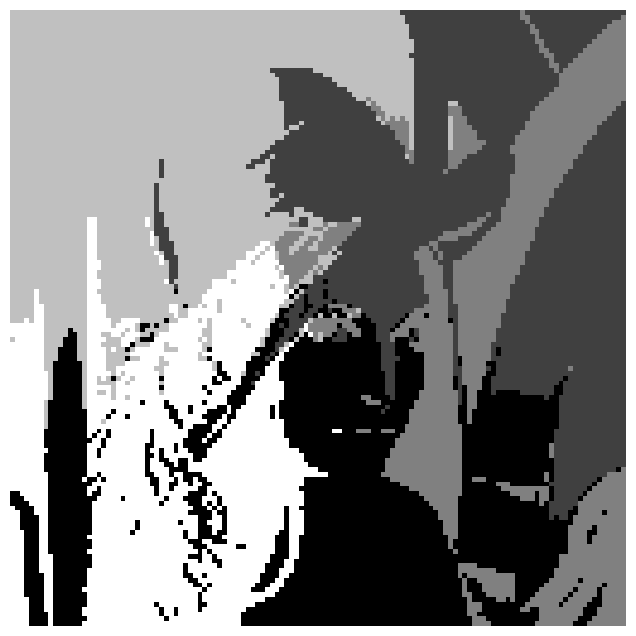

In [83]:
# Assign each pixel to the nearest cluster center
segmented_img = kmeans.labels_.reshape(128, 128)

# Visualize the result
plt.figure(figsize=(8, 8))
plt.imshow(segmented_img, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()